In [11]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro
from scipy import stats
from statsmodels.graphics.gofplots import qqplot


####  **Define the data**

In [12]:
df = pd.read_csv("https://excelr.s3.nl-ams.scw.cloud/DataScience-Assignments/Assignments/hypothesis%20Testing/Cutlets.csv")
df

,Unit A,Unit B
0,6.8090,6.7703
1,6.4376,7.5093
2,6.9157,6.7300
3,7.3012,6.7878
4,7.4488,7.1522
5,7.3871,6.8110
6,6.8755,7.2212
7,7.0621,6.6606
8,6.6840,7.2402
9,6.8236,7.0503


#### **Checking *na* Values**

In [13]:
df.isna().sum()

Unit A    0
Unit B    0
dtype: int64

This indicates that there are no missing values in the dataset.


#### **Check the distribution of the data.**

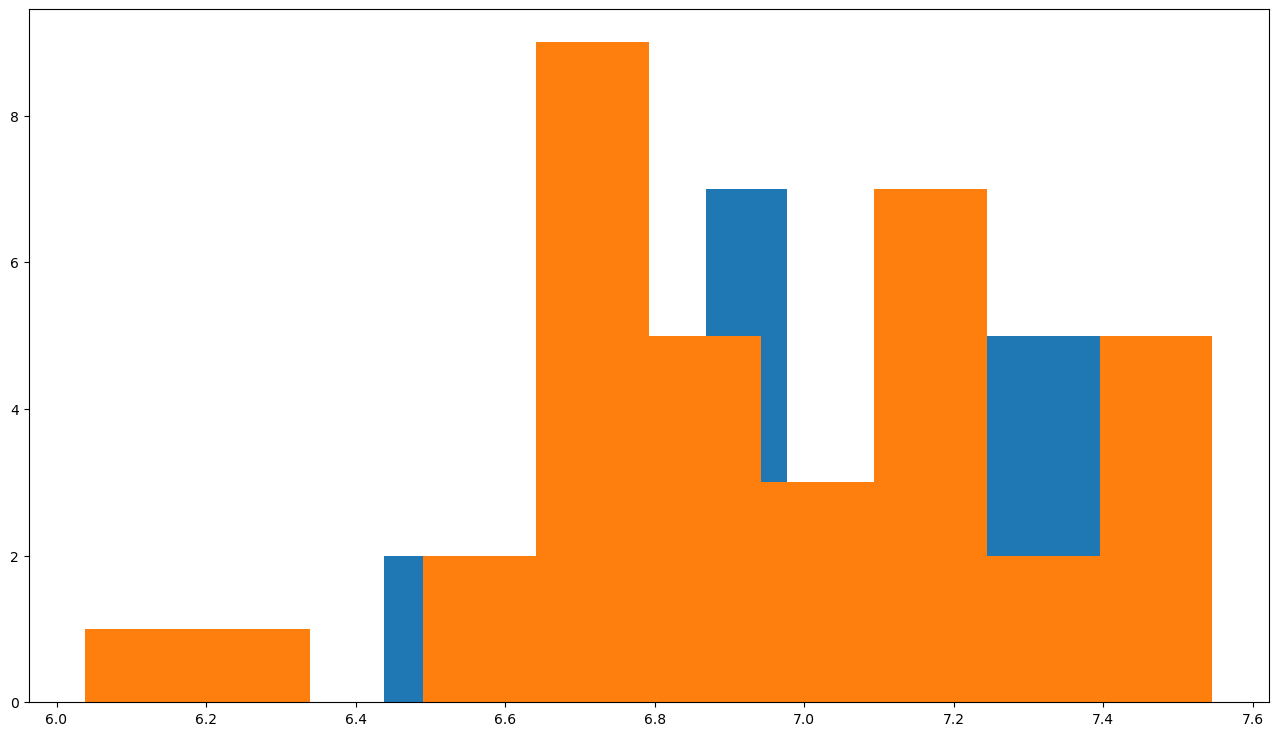

In [14]:
plt.figure(figsize=(16, 9))
plt.hist(df['Unit A'], bins=10)
plt.hist(df['Unit B'], bins=10)
plt.show()

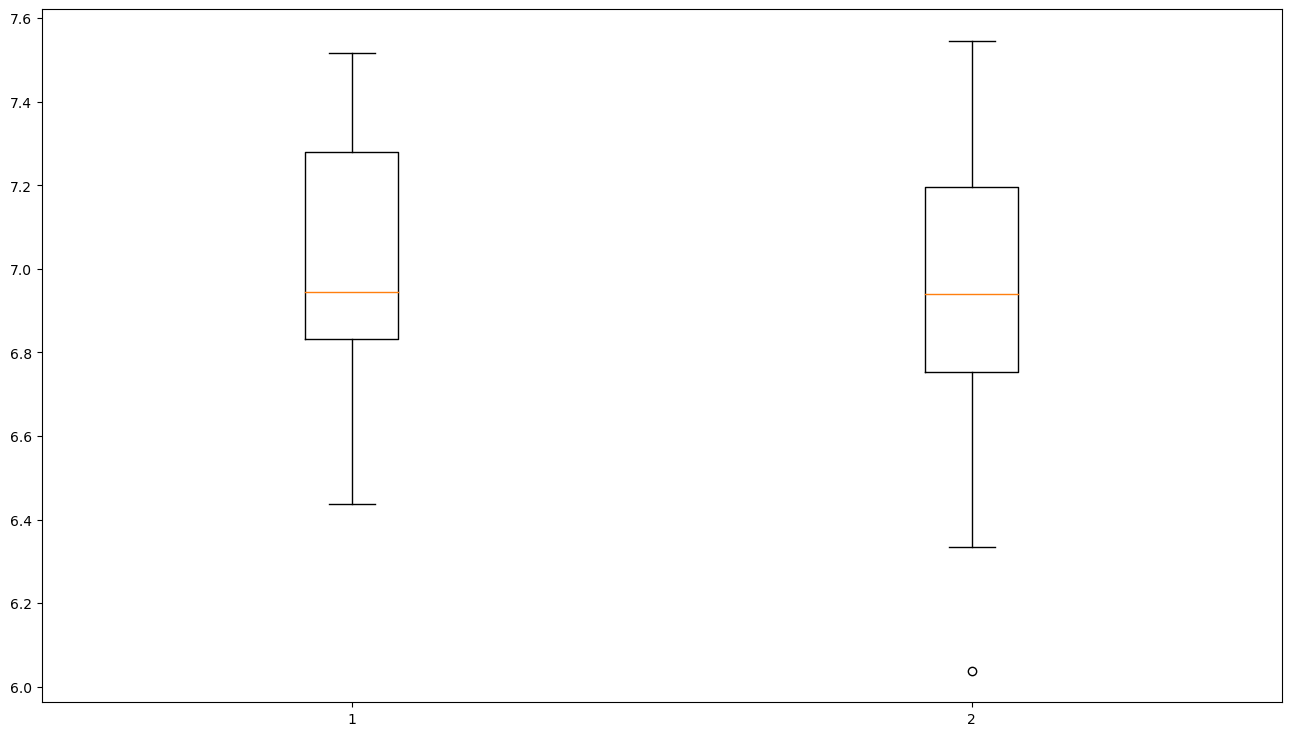

In [15]:
plt.figure(figsize=(16, 9))
plt.boxplot([df['Unit A'], df['Unit B']])
plt.show()

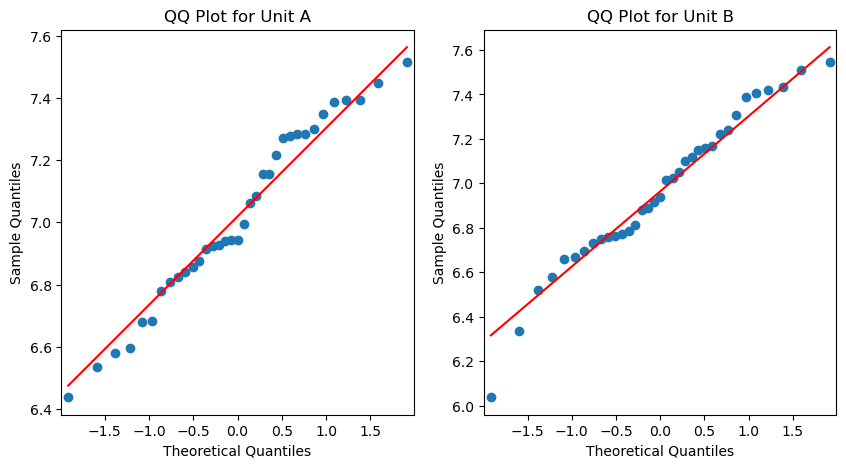

In [16]:

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
qqplot(df['Unit A'], line='s', ax=ax[0])
ax[0].set(title='QQ Plot for Unit A')
qqplot(df['Unit B'], line='s', ax=ax[1])
ax[1].set(title='QQ Plot for Unit B')
plt.show()



#### **Check the normality of the data**

In [17]:
w, p_value = shapiro(df)
print('Shapiro-Wilk test: p-value = {}'.format(p_value))

Shapiro-Wilk test: p-value = 0.20446749031543732


#### **Check the equality of variances**

In [18]:
levene_test = stats.levene(df['Unit A'], df['Unit B'])
print(levene_test)

LeveneResult(statistic=0.6650897638632386, pvalue=0.4176162212502553)


#### **Conduct the t-test.**

In [19]:
t_test = stats.ttest_ind(df['Unit A'], df['Unit B'])
print(t_test)

Ttest_indResult(statistic=0.7228688704678063, pvalue=0.4722394724599501)


#### **Draw inferences**

In [20]:
if t_test.pvalue < 0.05:
    print('There is a significant difference in the diameter of the cutlet between the two units.')
else:
    print('There is no significant difference in the diameter of the cutlet between the two units.')

There is no significant difference in the diameter of the cutlet between the two units.
